In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [14]:
# Carrega o dataset
dados = pd.read_csv("dados_historicos.csv",sep=';')
dados = dados[['TARGET_FLAG','YOJ']]
dados['YOJ'] = pd.to_numeric(dados['YOJ'], errors='coerce')
dados = dados.dropna()
dados

,TARGET_FLAG,YOJ
0,0,11.0
1,0,11.0
2,0,10.0
3,0,14.0
5,1,12.0
...,...,...
8138,0,10.0
8139,0,12.0
8140,0,11.0
8141,0,7.0


In [16]:
#Analise descritiva
dados['YOJ'].describe()

count    7689.000000
mean       10.498244
std         4.095762
min         0.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        23.000000
Name: YOJ, dtype: float64

# Comparação entre as 2 variaveis

<AxesSubplot:xlabel='TARGET_FLAG', ylabel='YOJ'>

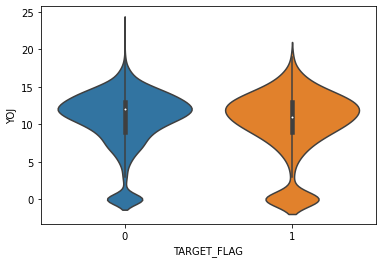

In [17]:
import seaborn as sns
sns.violinplot(x='TARGET_FLAG',y='YOJ',data=dados,scale='width')

# Separar a variavel

In [24]:
#Teste de shapiro

teste_classe0 = dados[dados.TARGET_FLAG ==0]
teste_classe0 = teste_classe0.YOJ
teste_classe1 = dados[dados.TARGET_FLAG ==1]
teste_classe1 = teste_classe1.YOJ

print(f'Tamanho dos dados classe 0: {len(teste_classe0)}')
print(f'Tamanho dos dados classe 1: {len(teste_classe1)}')

Tamanho dos dados classe 0: 5661
Tamanho dos dados classe 1: 2028


# Teste de shapiro

**Verificar se os dados seguem uma distribuição normal**

In [26]:
#Teste de Shapiro Francia
import scipy.stats as stats
shapiro_stats, shapiro_p_valor = stats.shapiro(teste_classe0)
print(f'{shapiro_p_valor:.6f}, Maior que 0.05 ,Tem Distribuiçao Normal')

0.000000, Maior que 0.05 ,Tem Distribuiçao Normal


In [27]:
shapiro_stats, shapiro_p_valor = stats.shapiro(teste_classe1)
print(f'{shapiro_p_valor:.6f}, Maior que 0.05 ,Tem Distribuiçao Normal')

0.000000, Maior que 0.05 ,Tem Distribuiçao Normal


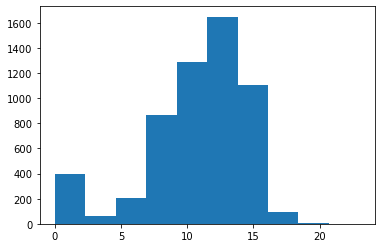

In [28]:
plt.hist(teste_classe0);

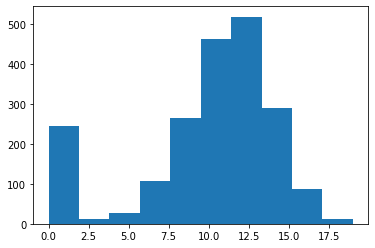

In [29]:
plt.hist(teste_classe1);

**As duas distribuições são gaussianas**

# Média das 2 amostras

In [41]:
a = round(teste_classe0.mean(),2)
b = round(teste_classe1.mean(),2) 

print(f'Média da classe 0: {a}')
print(f'Média da classe 1: {b}')

Média da classe 0: 10.67
Média da classe 1: 10.02


**As 2 médias são praticamente iguais, vamos comprovar com o teste de Homogeneidade**

# Teste de Homogeneidade de bartlett

**Verificar se as variancias são iguais para as amostras**

In [35]:
#Verificar há diferença estatistica entre as 2 médias
from scipy.stats import bartlett
stats , p_value = bartlett(teste_classe0, teste_classe1)
print(stats)
print(f'P_valor: {round(p_value,5)}')

61.782852583498766
P_valor: 0.0


**P_valor menor que 0.05 portanto podemos considerar que a variância entre as 2 amostras não são iguais**